## **Introduction** 
To make a cancer detection model I will use Kaggle data for such a project here is the link for it:
https://www.kaggle.com/datasets/andrewmvd/lung-and-colon-cancer-histopathological-images

**About the data:**

There are five classes in the dataset, each with 5,000 images, being:
- Lung benign tissue
- Lung adenocarcinoma
- Lung squamous cell carcinoma
- Colon adenocarcinoma
- Colon benign tissue

### **Data preparation and Lableling**

After uploading you Kaggle file to get the data to the colab, use the API command and unzip the file.



In [1]:
import os, shutil
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d andrewmvd/lung-and-colon-cancer-histopathological-images

100% 1.75G/1.76G [00:11<00:00, 157MB/s]
100% 1.76G/1.76G [00:11<00:00, 163MB/s]


In [ ]:
!unzip \*.zip && rm *.zip


In [4]:
print(os.listdir('/content/lung_colon_image_set'))
print(os.listdir('/content/lung_colon_image_set/lung_image_sets'))
os.listdir('/content/lung_colon_image_set/colon_image_sets')

['colon_image_sets', 'lung_image_sets']
['lung_scc', 'lung_n', 'lung_aca']


['colon_n', 'colon_aca']

**Now I want to move the five classes dirs to be stored in one directory called classes**

In [5]:
#make new dir called classes
os.mkdir('/content/classes')
os.listdir('/content/')

['.config', 'lung_colon_image_set', 'classes', 'kaggle.json', 'sample_data']

In [6]:

lungpath = '/content/lung_colon_image_set/lung_image_sets'
lung = os.listdir(lungpath)
colonpath = '/content/lung_colon_image_set/colon_image_sets'
colon = os.listdir(colonpath)
#join both of them to one list to make directories
classes_list = colon + lung
for c in classes_list:
  os.mkdir('/content/classes/{}'.format(c))

os.listdir('/content/classes')  

['lung_scc', 'lung_n', 'lung_aca', 'colon_n', 'colon_aca']

In [7]:
#move lung classes to the general dir
#testing the code
for eachclass in lung:
  imgspath = os.path.join(lungpath + '/', eachclass)
  imgs =os.listdir(imgspath)
  for i in range(3):
    print(imgspath +'/' + imgs[i] , 'content/classes/{}'.format(eachclass))


/content/lung_colon_image_set/lung_image_sets/lung_scc/lungscc3203.jpeg content/classes/lung_scc
/content/lung_colon_image_set/lung_image_sets/lung_scc/lungscc4685.jpeg content/classes/lung_scc
/content/lung_colon_image_set/lung_image_sets/lung_scc/lungscc4082.jpeg content/classes/lung_scc
/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4435.jpeg content/classes/lung_n
/content/lung_colon_image_set/lung_image_sets/lung_n/lungn3074.jpeg content/classes/lung_n
/content/lung_colon_image_set/lung_image_sets/lung_n/lungn4783.jpeg content/classes/lung_n
/content/lung_colon_image_set/lung_image_sets/lung_aca/lungaca2221.jpeg content/classes/lung_aca
/content/lung_colon_image_set/lung_image_sets/lung_aca/lungaca1858.jpeg content/classes/lung_aca
/content/lung_colon_image_set/lung_image_sets/lung_aca/lungaca1897.jpeg content/classes/lung_aca


In [8]:

#move
for eachclass in lung:
  imgspath = os.path.join(lungpath + '/', eachclass)
  imgs =os.listdir(imgspath)
  for i in range(len(imgs)):
    shutil.move(imgspath +'/' + imgs[i] , '/content/classes/{}'.format(eachclass))
#make sure they moved correctly
print(os.listdir('/content/classes/lung_scc')[:3])
print(os.listdir('/content/classes/lung_aca')[:3])
os.listdir('/content/classes/lung_n')[:3]

['lungscc3203.jpeg', 'lungscc4685.jpeg', 'lungscc4082.jpeg']
['lungaca2221.jpeg', 'lungaca1858.jpeg', 'lungaca1897.jpeg']


['lungn4435.jpeg', 'lungn3074.jpeg', 'lungn4783.jpeg']

In [9]:
#same for colon classes
for eachclass in colon:
  imgspath = os.path.join(colonpath + '/', eachclass)
  imgs =os.listdir(imgspath)
  for i in range(len(imgs)):
    shutil.move(imgspath +'/' + imgs[i] , '/content/classes/{}'.format(eachclass))
#make sure they moved correctly
print(os.listdir('/content/classes/colon_aca')[:3])
os.listdir('/content/classes/colon_n')[:3]

['colonca1195.jpeg', 'colonca3347.jpeg', 'colonca569.jpeg']


['colonn2306.jpeg', 'colonn1367.jpeg', 'colonn2856.jpeg']

**Great! Alhmdulillah all is moved correctly!** 

**Let's split the classes into train, validation, and test for our model.**

In [10]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import splitfolders
splitfolders.ratio("/content/classes", output="/content/splited_data",
    seed=1337, ratio=(.7, .2, .1), group_prefix=None, move=True) # default values
    #ratio =(train,validation, and test respectivly)

Copying files: 25000 files [00:01, 13501.31 files/s]


In [12]:
base = '/content/splited_data'
train_dir = os.path.join(base, 'train')
os.listdir(train_dir)

['lung_scc', 'lung_n', 'lung_aca', 'colon_n', 'colon_aca']

In [13]:


val_dir = os.path.join(base, 'val')
os.listdir(val_dir)

['lung_scc', 'lung_n', 'lung_aca', 'colon_n', 'colon_aca']

In [14]:
test_dir = os.path.join(base, 'test')
os.listdir(test_dir)

['lung_scc', 'lung_n', 'lung_aca', 'colon_n', 'colon_aca']

## **Data Augmentation**

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [16]:
target_shape = (224 , 224)  # the shape that MobileNet pretrained model accepts is 224 X 224
train_image_gen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=45,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.1,
      zoom_range=0.5,
      horizontal_flip=True,
      fill_mode='nearest')

train_gen = train_image_gen.flow_from_directory(
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size = target_shape,
                                                     class_mode='sparse')

Found 17500 images belonging to 5 classes.


In [17]:
image_gen = ImageDataGenerator(rescale=1./255)
val_gen = image_gen.flow_from_directory(
                                                     directory=val_dir,
                                                     shuffle=True,
                                                     target_size = target_shape,
                                                     class_mode='sparse')

Found 5000 images belonging to 5 classes.


In [18]:
test_gen = image_gen.flow_from_directory(
                                         directory = test_dir,
                                         shuffle = True,
                                         target_size = target_shape,
                                         class_mode = 'sparse')

Found 2500 images belonging to 5 classes.


**See the augmented image.**

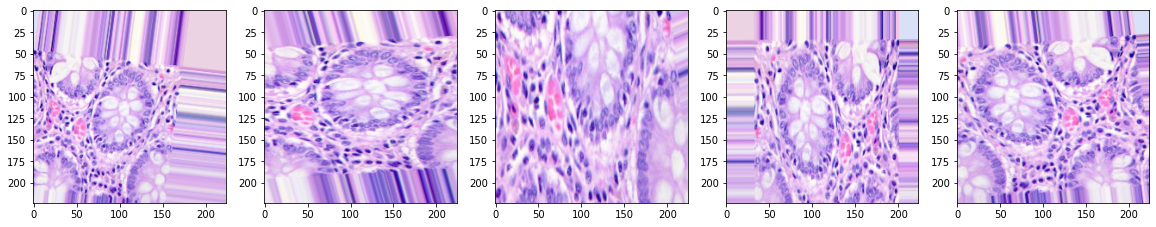

In [19]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
augmented_images = [train_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)    

## **Labels**

To see they are arranged and labeled



In [20]:
train_gen.class_indices

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

## **Bulid the model**
using MobileNet pretrained feature vector model(Transfer learning):

https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4

In [21]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential

In [22]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
classes = 5
 
pretrained_model_without_last_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

model = tf.keras.Sequential([
  pretrained_model_without_last_layer,
  tf.keras.layers.Dense(classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [23]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
  metrics= [keras.metrics.SparseCategoricalAccuracy()])


In [24]:
epochs = 5 #  one epoch takes time so I will go with just 5.
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2) #set the patience to suit epochs number
history = model.fit_generator(
    train_gen,
    epochs=epochs,
    validation_data=val_gen,
    callbacks= [early_stopping_monitor] 
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/5
547/547 [==============================] - 667s 1s/step - loss: 0.3003 - sparse_categorical_accuracy: 0.8959 - val_loss: 0.1377 - val_sparse_categorical_accuracy: 0.9548
Epoch 2/5
547/547 [==============================] - 652s 1s/step - loss: 0.1484 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.1010 - val_sparse_categorical_accuracy: 0.9680
Epoch 3/5
547/547 [==============================] - 628s 1s/step - loss: 0.1276 - sparse_categorical_accuracy: 0.9535 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9718
Epoch 4/5
547/547 [==============================] - 623s 1s/step - loss: 0.1198 - sparse_categorical_accuracy: 0.9550 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9698
Epoch 5/5
547/547 [==============================] - 631s 1s/step - loss: 0.1075 - sparse_categorical_accuracy: 0.9617 - val_loss: 0.0844 - val_sparse_categorical_accuracy: 0.9708


## **Accuracy, Loss and Evaluation**

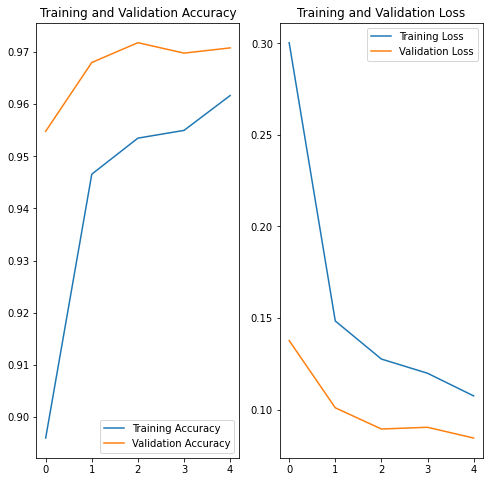

In [25]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [26]:
model.evaluate(test_gen[0][0].tolist(),test_gen[0][1].astype(int).tolist()) # test_gen[0][1] contains imgs and test_gen[0][1] contains labels.

1/1 [==============================] - 1s 1s/step - loss: 0.2301 - sparse_categorical_accuracy: 0.9375


[0.23010200262069702, 0.9375]

## **Prediction**
You can you whatever image you want but I will use one from the test data.

Testing image No. 10 from the test data for example:

First let's see it and its class.



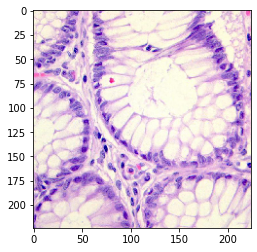

In [27]:
#show the image
img_number = 10
plt.imshow(test_gen[0][0][img_number])

In [28]:
#show its label
test_gen[0][1].astype(int).tolist()[img_number]

1

In [32]:
test_gen.class_indices

{'colon_aca': 0, 'colon_n': 1, 'lung_aca': 2, 'lung_n': 3, 'lung_scc': 4}

**So it is colon benign tissue image.**

**Now let's predict it using the model...**

In [30]:
#predict the class probablity for the image
prediction = model.predict(np.array([test_gen[0][0][img_number]]))
# get the max probability
acc =np.argmax(prediction)
#get the text label
classes = list(train_gen.class_indices.keys())
encodings = list(train_gen.class_indices.values())
position = encodings.index(acc)

classes[position]

'colon_n'

**The model predicted it right!**

## **Save the model**

In [31]:
from keras.models import save_model
model.save("cancer_detection.h5")